In [ ]:
# execfile('/home/henrywotton/repos/pymisca/')

In [157]:
import pymisca.ext as pyext
pyext.base__check()

import matplotlib.pyplot as plt
%matplotlib inline


[BASE]=/home/henrywotton/Desktop/BIOC0023_analysis


In [16]:
dfdir = dfc
# dfdir = dfc = pyext.dir__indexify('.')

In [11]:
X = dfc.values
MIN = X[X.nonzero()].min()

1.661475664146487e-06

In [74]:
! find . -name "*biom*" | xargs ls -lhSr

-rwxrwxrwx 1 henrywotton henrywotton 1.3K Mar 27 10:57 ./taxonomy_analysis/biom_table_summary.txt
-rwxrwxrwx 1 henrywotton henrywotton  42K Feb  2 14:28 ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L2.biom
-rwxrwxrwx 1 henrywotton henrywotton  65K Feb  2 14:28 ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L3.biom
-rwxrwxrwx 1 henrywotton henrywotton 109K Feb  2 14:28 ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L4.biom
-rwxrwxrwx 1 henrywotton henrywotton 180K Feb  2 14:28 ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L5.biom
-rwxrwxrwx 1 henrywotton henrywotton 334K Feb  2 14:28 ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L6.biom
-rwxrwxrwx 1 henrywotton henrywotton 659K Feb  2 14:28 ./taxonomy_analysis/table_even30000.biom.gz
-rwxrwxrwx 1 henrywotton henrywotton 1.1M Feb  2 14:28 ./taxonomy_analysis/table_mc30000.biom.gz
-rwxrwxrwx 1 henrywotton henrywotton 4.0M Feb  2 14:28 ./taxonomy_analysis/taxa_plots/table_mc30000_sorted.biom
-rwxrwxrwx 1 henryw

In [313]:


def biom2tsv(INPUT):
#     INPUT=./taxonomy_analysis/table_mc30000.biom 
#     OUTPUT=./taxonomy_analysis/table_mc30000.txt
    OUTPUT = INPUT.replace('.biom','.tsv')
    CMD = 'biom convert -i {INPUT} -o {OUTPUT} --to-tsv --header-key taxonomy'.format(**locals())
    res = pyext.shellexec(CMD,)
    
    CMD = 'sed --in-place "s/\#OTU ID/OTU_ID/g" {OUTPUT}'.format(**locals())
    res = pyext.shellexec(CMD,)
    
    return OUTPUT

# fname = './taxonomy_analysis/table_mc30000.txt'

def read_data(fname):

    dfc0 = dfc = pyext.readBaseFile(fname,ext='tsv',header=None)
    dfc=dfc.drop(columns=0)
    # dfc.set_index(keys=28)
    print(dfc.shape[1])
    print(dfc.shape)

    dfc = dfc.set_index(keys=dfc.shape[1])

    allData = dfc.copy()
    allData.to_csv('allData.csv')
    dfc.head()
    return dfc

In [314]:
%%time

fnames = ! find . -name "*biom" 
fnames

ofnames = map(biom2tsv, fnames)
    

biom convert -i ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L5.biom -o ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L5.tsv --to-tsv --header-key taxonomy
sed --in-place "s/\#OTU ID/OTU_ID/g" ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L5.tsv
biom convert -i ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L2.biom -o ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L2.tsv --to-tsv --header-key taxonomy
sed --in-place "s/\#OTU ID/OTU_ID/g" ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L2.tsv
biom convert -i ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L4.biom -o ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L4.tsv --to-tsv --header-key taxonomy
sed --in-place "s/\#OTU ID/OTU_ID/g" ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L4.tsv
biom convert -i ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L3.biom -o ./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L3.tsv --to-tsv --header-key taxonomy
sed --in-place "s/\#OTU ID/OTU_ID/g"

In [144]:
! head './taxonomy_analysis/table_mc30000.tsv'

# Constructed from biom file
OTU ID	515rcbc190	515rcbc189	515rcbc176	515rcbc184	515rcbc168	515rcbc187	515rcbc177	515rcbc174	515rcbc156	515rcbc181	515rcbc157	515rcbc169	515rcbc188	515rcbc191	515rcbc175	515rcbc178	515rcbc194	515rcbc180	515rcbc170	515rcbc193	515rcbc159	515rcbc185	515rcbc192	515rcbc161	515rcbc160	515rcbc186	515rcbc179	taxonomy
4479944	31.0	185.0	17.0	69.0	27.0	17.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	k__Bacteria; p__Actinobacteria; c__MB-A2-108; o__0319-7L14; f__; g__; s__
1041236	0.0	0.0	0.0	0.0	2.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	k__Bacteria; p__Firmicutes; c__Bacilli; o__Bacillales; f__Bacillaceae; g__; s__
1050608	28.0	195.0	84.0	81.0	128.0	107.0	51.0	521.0	152.0	80.0	60.0	312.0	60.0	23.0	75.0	23.0	23.0	7.0	7.0	1.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Corynebacteriaceae; g__Corynebacterium; s__
4479940	

In [126]:
ofnames

['./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L5.tsv',
 './taxonomy_analysis/taxa_plots/table_mc30000_sorted_L2.tsv',
 './taxonomy_analysis/taxa_plots/table_mc30000_sorted_L4.tsv',
 './taxonomy_analysis/taxa_plots/table_mc30000_sorted_L3.tsv',
 './taxonomy_analysis/taxa_plots/table_mc30000_sorted_L6.tsv',
 './taxonomy_analysis/taxa_plots/table_mc30000_sorted.tsv',
 './taxonomy_analysis/table_mc30000.tsv']

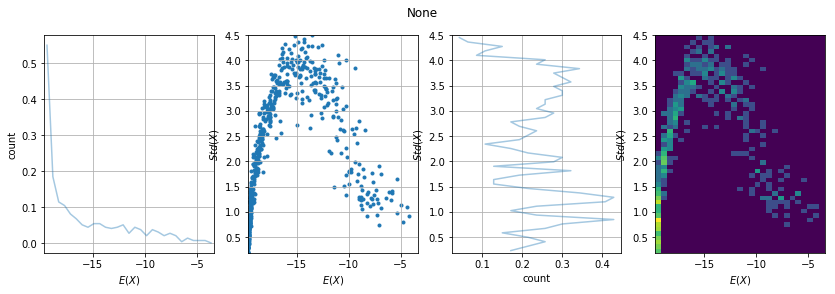

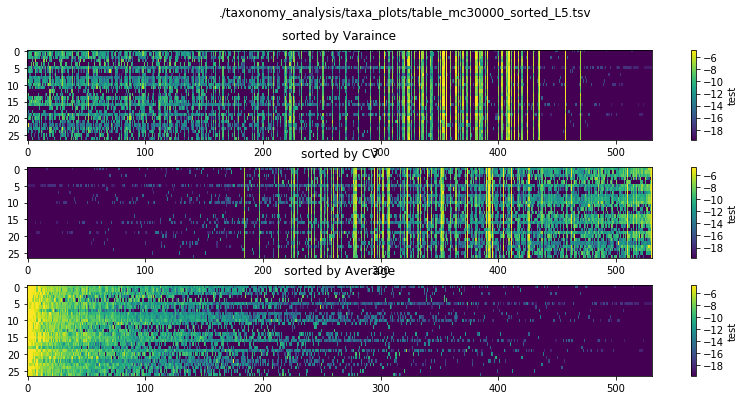

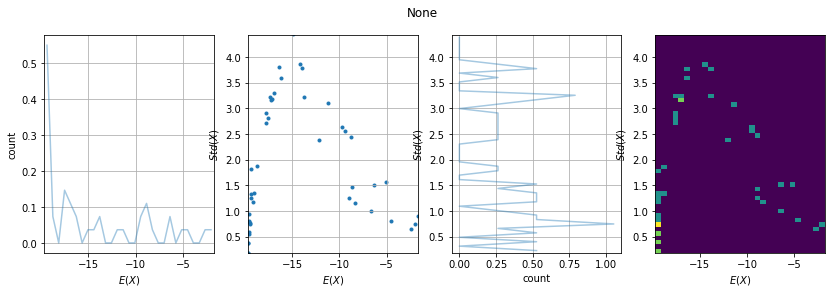

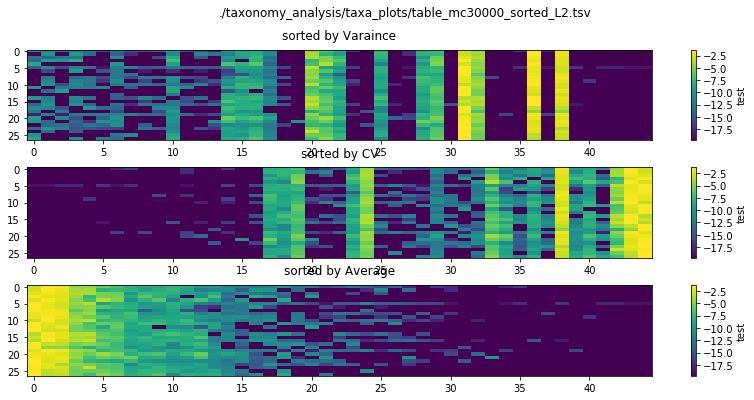

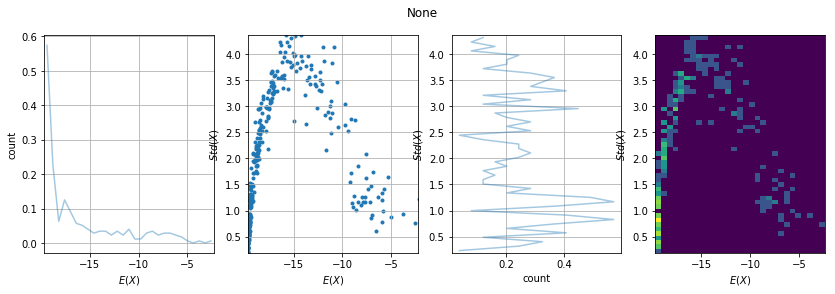

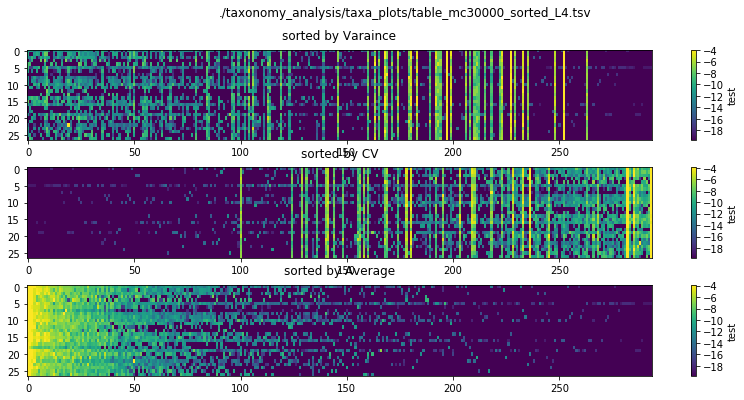

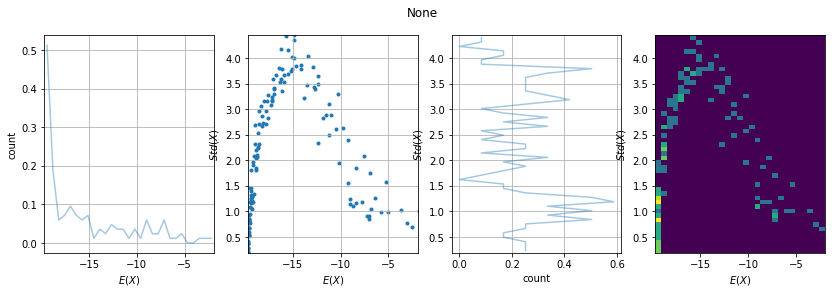

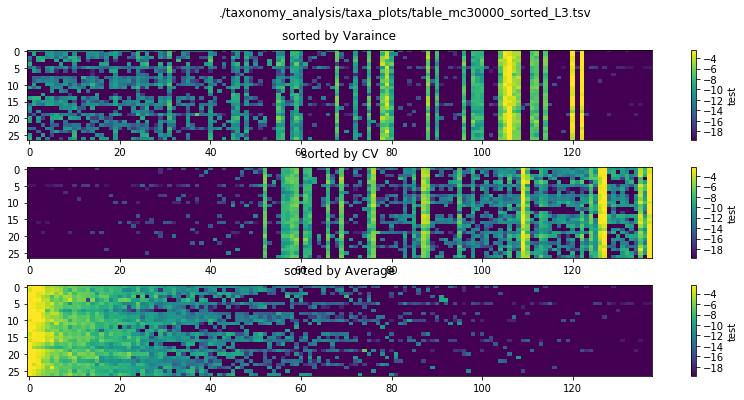

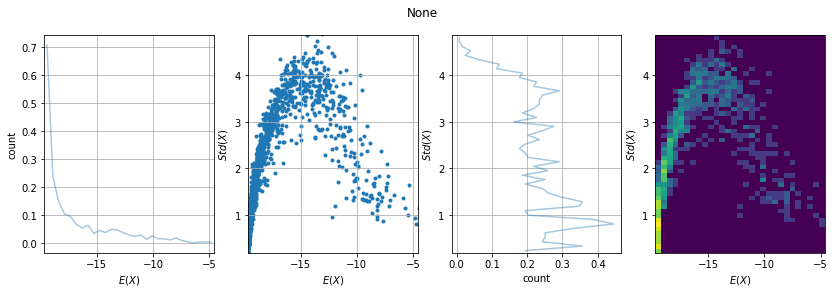

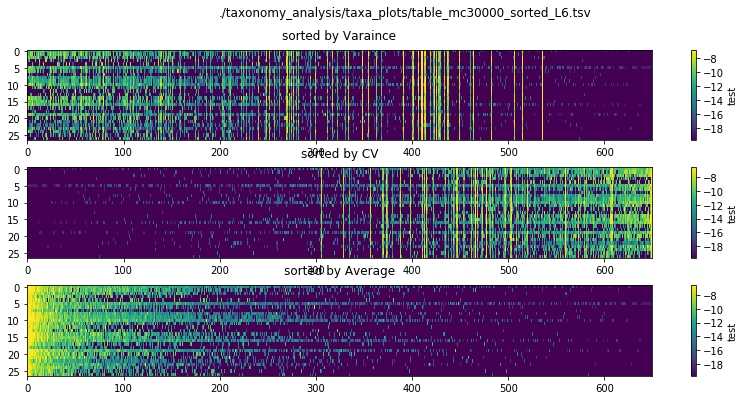

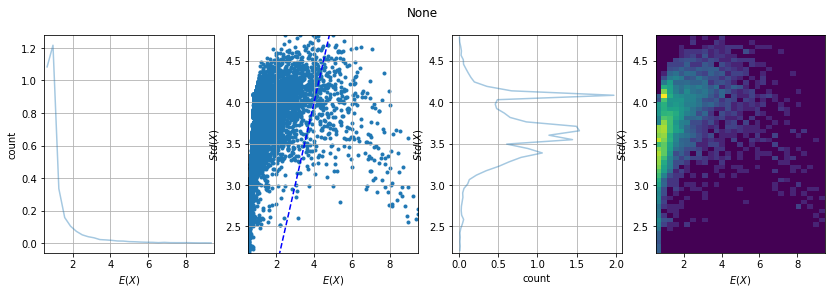

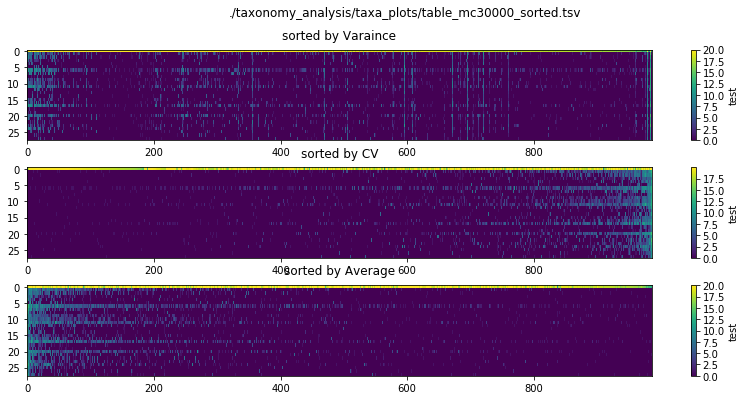

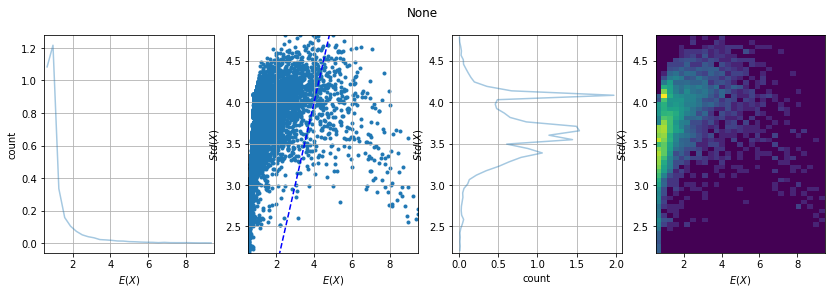

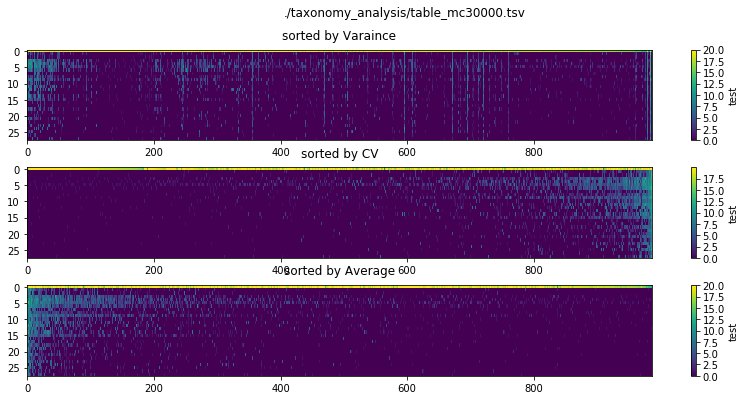

In [158]:
fname =  './taxonomy_analysis/taxa_plots/table_mc30000_sorted_L6.tsv'

for fname in ofnames:
    dfc = pyext.readData(fname).drop(columns = 'taxonomy')
    # dfc.shape
    # sutil.qc_Sort(dfc);

    X = dfc.values
    MIN = X[X.nonzero()].min()
    dfc = dfc + MIN
    dfc = dfc.apply(np.log2)
    sutil.qc_Sort(dfc,nMax=-1);
    plt.suptitle(fname)
    plt.show()
# .head()
# read_data(fname)
# ! head {fname}

In [162]:
# ofnames[0]
pyutil.printlines(
    ofnames
)

./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L5.tsv
./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L2.tsv
./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L4.tsv
./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L3.tsv
./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L6.tsv
./taxonomy_analysis/taxa_plots/table_mc30000_sorted.tsv
./taxonomy_analysis/table_mc30000.tsv


In [122]:
ofnames

['./taxonomy_analysis/taxa_plots/table_mc30000_sorted_L5.tsv',
 './taxonomy_analysis/taxa_plots/table_mc30000_sorted_L2.tsv',
 './taxonomy_analysis/taxa_plots/table_mc30000_sorted_L4.tsv',
 './taxonomy_analysis/taxa_plots/table_mc30000_sorted_L3.tsv',
 './taxonomy_analysis/taxa_plots/table_mc30000_sorted_L6.tsv',
 './taxonomy_analysis/taxa_plots/table_mc30000_sorted.tsv',
 './taxonomy_analysis/table_mc30000.tsv']

In [80]:
%%bash


gunzip --keep --force ./taxonomy_analysis/table_mc30000.biom.gz

ls -lhtr ./taxonomy_analysis/table_mc30000.biom
INPUT=./taxonomy_analysis/table_mc30000.biom 
OUTPUT=./taxonomy_analysis/table_mc30000.txt
biom convert -i $INPUT -o $OUTPUT --to-tsv --header-key taxonomy


echo DONE

-rwxrwxrwx 1 henrywotton henrywotton 4.0M Feb  2 14:28 ./taxonomy_analysis/table_mc30000.biom


In [73]:
! gunzip --keep  ./taxonomy_analysis/table_mc30000.biom.gz

gzip: ./taxonomy_analysis/table_mc30000.biom already exists; do you wish to overwrite (y or n)? ^C


In [112]:
MIN = dfc.values[dfc.values.nonzero()].min()
print MIN

1.0


In [83]:
type(dfc)

pandas.core.frame.DataFrame

(13808, 28)


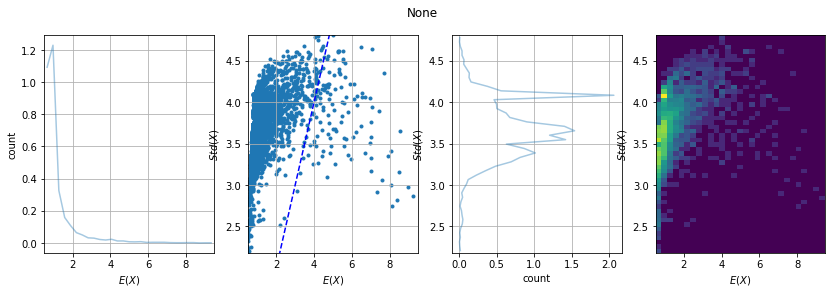

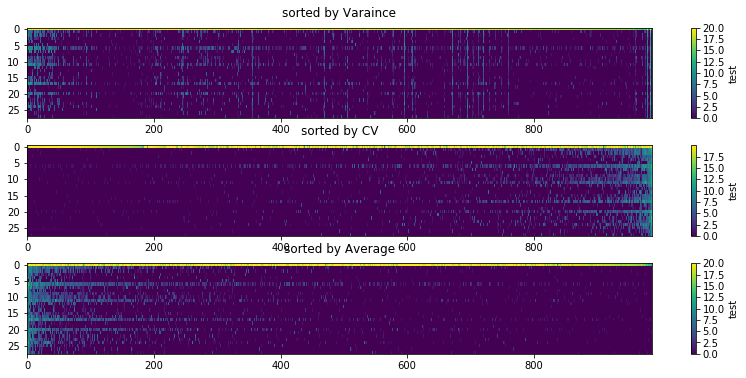

In [165]:
import pymisca.vis_util as pyvis
import numpy as np
%matplotlib inline

# fname = 'taxonomy_analysis/taxa_plots/table_mc30000_sorted_L4.txt'
# fname = './taxonomy_analysis/table_mc30000_sorted.tsv
fname = './taxonomy_analysis/taxa_plots/table_mc30000_sorted.tsv'
dfc = pyext.readData(fname).drop(columns = 'taxonomy')
#dfc0 = dfc = pyext.readBaseFile(fname,ext='tsv')
# ! head {fname}

print (dfc.shape)

X = dfc.values
MIN = X[X.nonzero()].min()
dfc = dfc + MIN
dfc = dfc.apply(np.log2)
# SIZE = 

# sutil.qc_Sort(dfc,xlim=[0,0.01]);
sutil.qc_Sort(dfc,);

# dfc = sutil.meanNorm(dfc)
# # dfc = dfc.apply(pyext.log2p1)
# pyvis.heatmap(dfc.T,figsize=[20,7],cname='test')

In [64]:
mdl.shape

(1298, 27)

In [42]:
# ??sutil.fit_KMEANS
import pymisca.util as pyutil

In [52]:
# dfc.reindex(clu.sort_values('clu').index)

[MSG] Now Fitting Model:Test_randomState=None_maxIt=1000_genre=KMEANS_nClu=30
[SUCC] to fit Model:Test_randomState=None_maxIt=1000_genre=KMEANS_nClu=30
   clu  count
0    0    693
1    1     93
2    2    156
3    3     98
4    4    259

 [WARN] unable to simplify condName. Exception:'int' object has no attribute 'split'


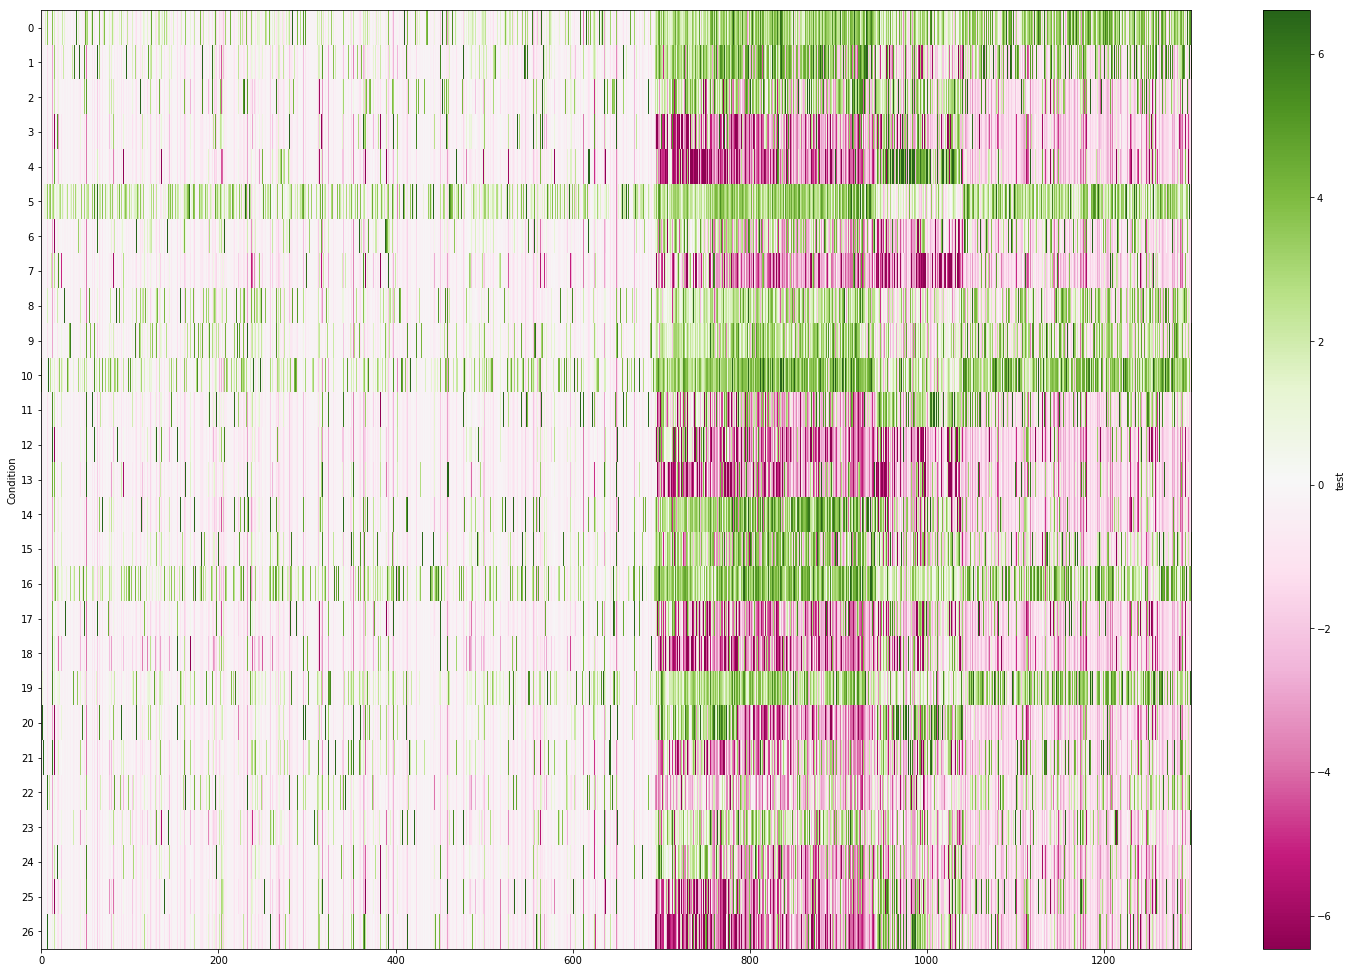

In [56]:
# import synotil.util as sutil
# mdl = sutil.fit_KMEANS(C=dfc)
dfc = sutil.fit_KMEANS(dfc,nClu=5)
clu = dfc.model.predict(dfc)
clu = dfc.copy().setDF(clu)
clu.columns = ['clu']

print (pyutil.get_cluCount(clu))
dfc.reindex(clu.sort_values('clu').index).heatmap(figsize=[20,14],)





In [317]:
#dfc = allData.copy()
##log transformation with pseudo counts
fname = './taxonomy_analysis/taxa_plots/table_mc30000_sorted.tsv'
dfc = pyext.readData(fname)
dfc

,OTU_ID,515rcbc156,515rcbc157,515rcbc159,515rcbc160,515rcbc161,515rcbc168,515rcbc169,515rcbc170,515rcbc174,...,515rcbc186,515rcbc187,515rcbc188,515rcbc189,515rcbc190,515rcbc191,515rcbc192,515rcbc193,515rcbc194,taxonomy
0,4479944,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,...,0.0,17.0,0.0,185.0,31.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Actinobacteria; c__MB-A2-108; ...
1,1041236,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...
2,1050608,152.0,60.0,1.0,0.0,0.0,128.0,312.0,7.0,521.0,...,0.0,107.0,60.0,195.0,28.0,23.0,0.0,1.0,23.0,k__Bacteria; p__Actinobacteria; c__Actinobacte...
3,4479940,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Proteobacteria; c__Gammaproteo...
4,973124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,k__Bacteria; p__Bacteroidetes; c__[Saprospirae...
5,1124709,10.0,0.0,0.0,0.0,0.0,78.0,0.0,0.0,8.0,...,0.0,54.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Bacteroidetes; c__Cytophagia; ...
6,436314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Bacteroidetes; c__Sphingobacte...
7,333731,40.0,0.0,1.0,0.0,0.0,21.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,38.0,k__Bacteria; p__Actinobacteria; c__Thermoleoph...
8,728991,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...
9,533625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Proteobacteria; c__Alphaproteo...


In [318]:
dfc.index = pyext.df__paste0(dfc,['OTU_ID','taxonomy'])

mkdir -p step1


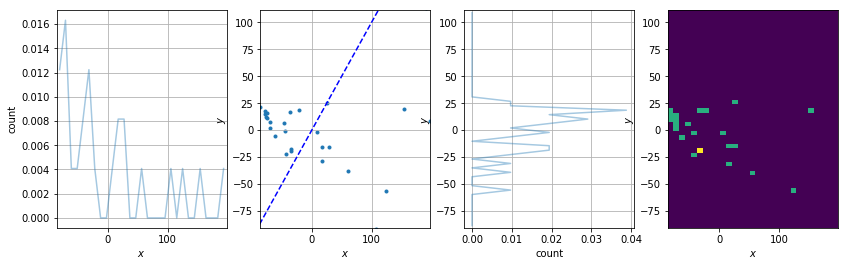

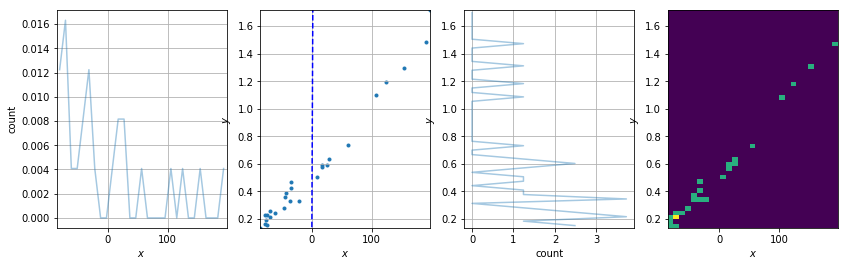

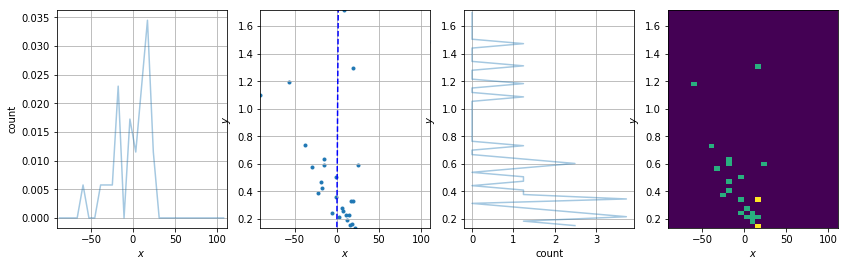

In [319]:
#dfc = allData.copy()
##log transformation with pseudo counts
fname = './taxonomy_analysis/taxa_plots/table_mc30000_sorted.tsv'
dfc = pyext.readData(fname)
# dfc = dfc.set_index('OTU ID')
# dfc = dfc.drop(columns = 'taxonomy',)

dfc.index = pyext.df__paste0(dfc,['OTU_ID','taxonomy'])
dfc = dfc.drop(columns=['OTU_ID','taxonomy'])
# fname = './taxonomy_analysis/taxa_plots/table_mc30000_sorted.tsv'
# dfc = pyext.readData(fname)
# dfc = dfc.set_index('taxonomy')
# dfc = dfc.drop(columns = 'OTU ID',)


X = dfc.values
MIN = X[X.nonzero()].min()
dfc = dfc + MIN
dfc = dfc.apply(np.log2)

mdl = sutil.fit_PCA(dfc.T)

xs,ys = mdl.trans_data.T[:2]
# axs= pyvis.qc_2var(xs,ys,nMax=-1,xlim=[-500,2500],)
# ! mkdir -p step1
pyext.shellexec('mkdir -p step1')

axs= pyvis.qc_2var(xs,ys,nMax=-1)
plt.savefig('step1/PCA.png')

libSize = dfc.mean(axis=0)

pyvis.qc_2var(xs, libSize)
plt.savefig('step1/PC1-libSize.png')

pyvis.qc_2var(ys, libSize)
plt.savefig('step1/PC2-libSize.png')

dfc.to_csv('step1/table_mc30000_sorted_log2.csv')
# pyvis.add_text(xs,ys,labs=dfc.columns,checkNA=0,ax=axs[1])

In [210]:
template =   'hello %s'
s = template % ('world')
print template
print s

template = 'hello {something}'
something = 'world'
template.format(**locals())

DIR = 'step1'


hello %s
hello world


'hello world'

In [310]:
dfc.index.sort_values().values[:20]

array(['k__Archaea; p__Crenarchaeota; c__MCG; o__; f__; g__; s__',
       'k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Cenarchaeales; f__Cenarchaeaceae; g__Nitrosopumilus; s__',
       'k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Cenarchaeales; f__SAGMA-X; g__; s__',
       'k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__',
       'k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__',
       'k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__',
       'k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__',
       'k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__',
       'k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerale

In [305]:
# dfc.index.is_unique
dfc.shape, dfc.query('index.duplicated()').shape

((13808, 27), (12119, 27))

mkdir -p step2


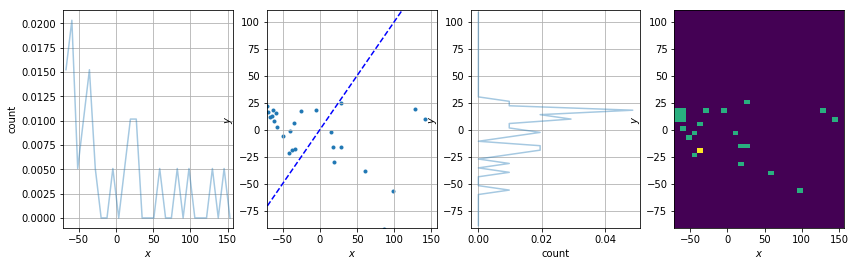

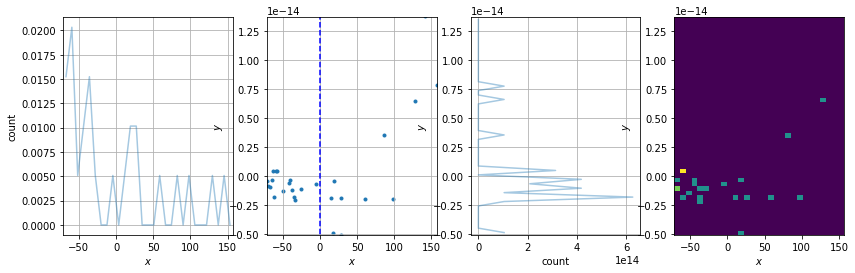

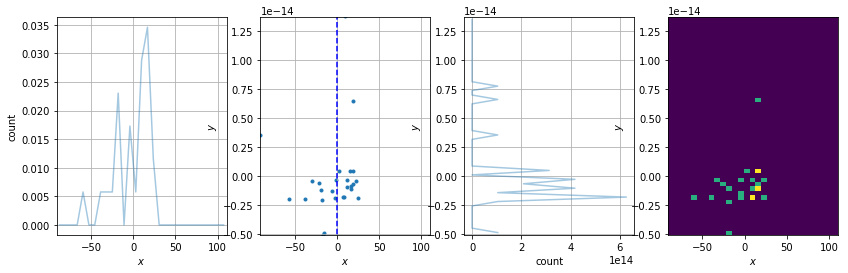

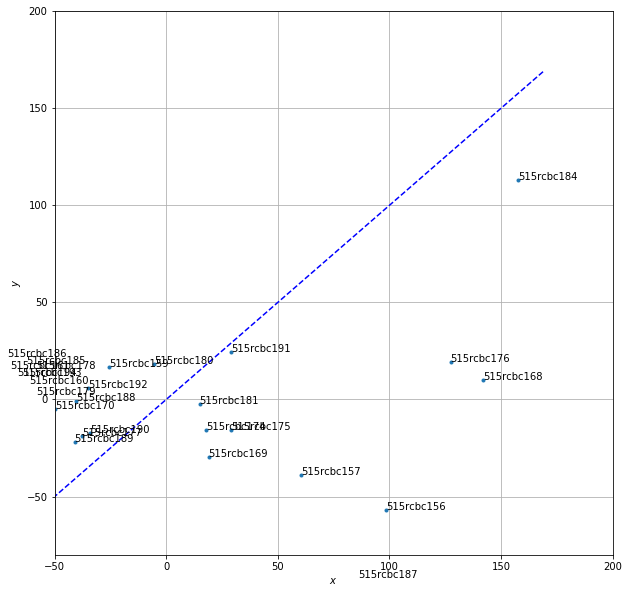

In [325]:

import synotil.CountMatrix as scount
import pandas as pd

dfc = pyext.readData('step1/table_mc30000_sorted_log2.csv')
# print dfc.head()
#dfc = dfc.set_index('OTU ID')
#dfc = dfc.drop(columns = 'taxonomy',)
dfc.head()
libSize = dfc.mean(axis=0)
dfc = dfc - libSize

# axs= pyvis.qc_2var(xs,ys,nMax=-1,xlim=[-500,2500],)
# ! mkdir -p step1
DIR = 'step2'

pyext.shellexec('mkdir -p {DIR}'.format(**locals()))

mdl = sutil.fit_PCA(dfc.T)
xs,ys = mdl.trans_data.T[:2]
axs= pyvis.qc_2var(xs,ys,nMax=-1,)

plt.savefig('{DIR}/PCA.png'.format(**locals()))

libSize = dfc.mean(axis=0)

pyvis.qc_2var(xs, libSize)
plt.savefig('{DIR}/PC1-libSize.png'.format(**locals()))

pyvis.qc_2var(ys, libSize)
plt.savefig('{DIR}/PC2-libSize.png'.format(**locals()))

dfc.to_csv('{DIR}/table_mc30000_sorted_log2.csv'.format(**locals()))




mdl = sutil.fit_PCA(dfc.T)
xs,ys = mdl.trans_data.T[:2]
fig,ax = plt.subplots(1,1,figsize=[10,10])
axs= pyvis.qc_2var(xs,ys,nMax=-1,axs=[None,ax,None,None],xlim=[-50,200],ylim=[-80,200])
pyvis.add_text(xs,ys,labs=dfc.columns,checkNA=0,ax=axs[1])



In [262]:

dfc.columns


Index([u'515rcbc156', u'515rcbc157', u'515rcbc159', u'515rcbc160',
       u'515rcbc161', u'515rcbc168', u'515rcbc169', u'515rcbc170',
       u'515rcbc174', u'515rcbc175', u'515rcbc176', u'515rcbc177',
       u'515rcbc178', u'515rcbc179', u'515rcbc180', u'515rcbc181',
       u'515rcbc184', u'515rcbc185', u'515rcbc186', u'515rcbc187',
       u'515rcbc188', u'515rcbc189', u'515rcbc190', u'515rcbc191',
       u'515rcbc192', u'515rcbc193', u'515rcbc194'],
      dtype='object')


 [WARN] unable to simplify condName. Exception:list index out of range


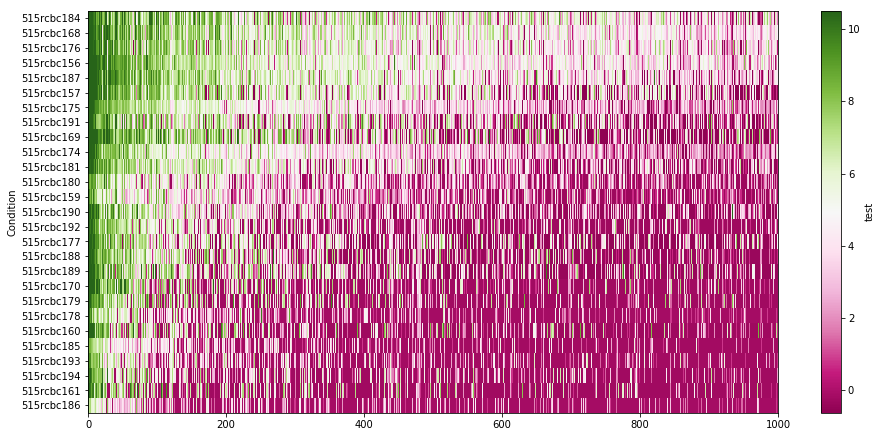

In [332]:
dfc = pyext.readData('step1/table_mc30000_sorted_log2.csv')
# print dfc.head()
#dfc = dfc.set_index('OTU ID')
#dfc = dfc.drop(columns = 'taxonomy',)
dfc.head()
libSize = dfc.mean(axis=0)
dfc = dfc - libSize

mdl = sutil.fit_PCA(dfc.T)
xs,ys = mdl.trans_data.T[:2]
#axs= pyvis.qc_2var(xs,ys,nMax=-1,)

PC_results = pd.DataFrame(mdl.trans_data)
PC_results = PC_results.set_index(dfc.columns)
PC_results = PC_results.sort_values(0,ascending=False)

dfc = scount.countMatrix(dfc).qc_Avg();
## M means the average expression of the species of our samples
index = dfc.summary.sort_values('M',ascending=False).index
c_index = PC_results.index


#dfc = dfc0.copy()
# dfc = pyext.readData(fname)
dfc = scount.countMatrix(dfc)

dfc = dfc.reindex(index)
# dfc = dfc.reindex()
dfc = dfc.reindex(columns=c_index)
# dfc.heatmap(figsize=[12,6])
dfc = dfc.setDF(dfc.iloc[:1000])
dfc.heatmap(figsize=[12,6])

# dfc.heatmap()


In [338]:
meta = pyext.readData('step1/mapping_file.tsv')
meta = meta.reindex(c_index)
meta

,BarcodeSequence,LinkerPrimerSequence,Year,Month,Day,TimeOfSample,TubeStation,Line,Zone,Direction,SurfaceSwabbed,SampleSiteDescription,Whocollected,EntryExitFigures,SurfaceAppearancePostSwabbing
515rcbc184,TTAAGTTAAGTT,N,2018,10,22,15:41,Chiswick Park,District,3,Eastbound,Oyster screen,"dirty, swap was brown",Ava,2.25,no change
515rcbc168,TCAGACCAACTG,N,2018,10,22,15:16,Kentish Town,Northern,2,South Kenninton via Charing X,Oyster Screen,Dirty/Warm,Natalya,8.35,no change
515rcbc176,CTAGCGTGCGTT,N,2018,10,22,15:05,Waterloo,Jubilee,1,East,Oyster screen,"dirty, sooty",Lauren,91.27,no change
515rcbc156,ATATGTTCTCAA,N,2018,10,22,15:12,Bank,Waterloo_and_City,1,West,Oyster Screen,Smudged but not too dirty,Hermione,57.50,no change
515rcbc187,CGATGAATATCG,N,2018,10,22,14:56,Tottenham Court Road,Central,1,Eastbound,Oyster screen,"dirty, swap was brown, screen was a bit sticky...",Xinyi,41.33,"less sticky, clearer, fingerprints removed"
515rcbc157,ATGTGCTGCTCG,N,2018,10,22,15:05,Bank,Waterloo_and_City,1,West,Escalator,Very dirty,Hermione,57.50,no change
515rcbc175,ACGACAACGGGC,N,2018,10,22,14:43,Regents Park,Bakerloo,1,Southbound,staircase handrail,"Clean, swab was brown",Yasmeen,3.61,no change
515rcbc191,TGACAGAATCCA,N,2018,10,22,14:40,Regents Park,Bakerloo,1,Southbound,Oyster screen,"Brown, dirty",Yasmeen,3.61,no change
515rcbc169,CCACGAGCAGGC,N,2018,10,22,15:10,Kentish Town,Northern,2,South Kenninton via Charing X,"Escalator, leaving platform",Very dirty,Natalya,8.35,no change
515rcbc174,CTTGCTCATAAT,N,2018,10,22,15:40,Kings Cross St Pancras,Circle,1,NaN,Oyster Screen,Slightly dirty,Iana,97.92,no change


mkdir -p step2


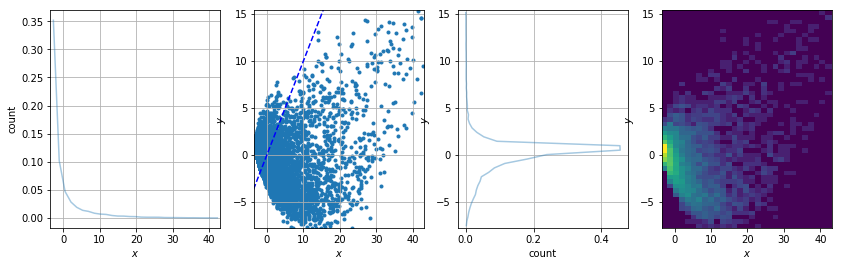

In [266]:

mdl = sutil.fit_PCA(dfc)

xs,ys = mdl.trans_data.T[:2]
# axs= pyvis.qc_2var(xs,ys,nMax=-1,xlim=[-500,2500],)
# ! mkdir -p step1
DIR = 'step2'

pyext.shellexec('mkdir -p {DIR}'.format(**locals()))

axs= pyvis.qc_2var(xs,ys,nMax=-1)
plt.savefig('{DIR}/PCA.png'.format(**locals()))

((array([ 0.62967225, -0.48998272,  3.72856091, ...,  0.71188821,
          6.20443559,  0.42602348]),
  array([2.06234095, 0.36713251, 2.69104795, ..., 1.8099996 , 2.13477971,
         0.81894246]),
  array([ 3.27526098, -0.74927644,  0.72173903, ...,  2.54253346,
          0.34407315,  1.92229421])),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1bd6ca610>,
       dtype=object))

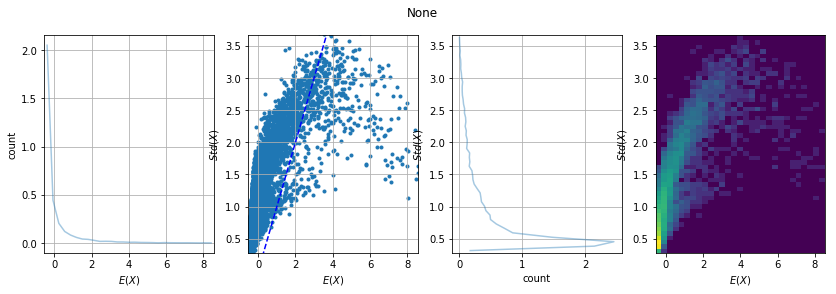

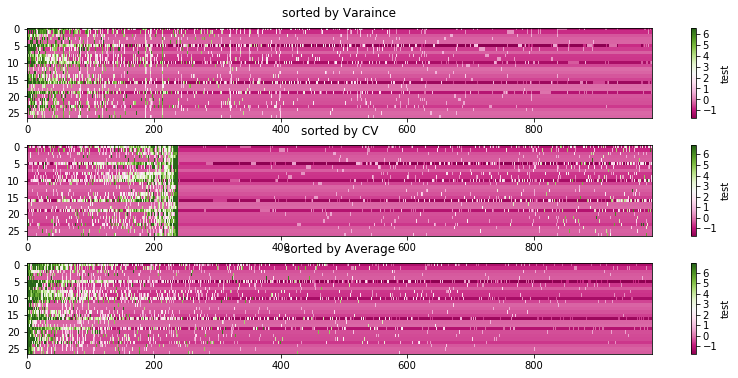

In [213]:
sutil.qc_Sort(dfc,nMax=-1)

In [188]:
libSize

515rcbc156    1.195184
515rcbc157    0.737172
515rcbc159    0.329501
515rcbc160    0.258980
515rcbc161    0.224547
515rcbc168    1.720413
515rcbc169    0.578148
515rcbc170    0.241981
515rcbc174    0.588411
515rcbc175    0.635494
515rcbc176    1.298947
515rcbc177    0.464710
515rcbc178    0.151966
515rcbc179    0.216216
515rcbc180    0.329127
515rcbc181    0.503380
515rcbc184    1.483231
515rcbc185    0.160134
515rcbc186    0.134447
515rcbc187    1.098541
515rcbc188    0.357532
515rcbc189    0.390440
515rcbc190    0.420885
515rcbc191    0.592335
515rcbc192    0.281423
515rcbc193    0.190941
515rcbc194    0.230412
dtype: float64

In [183]:
dfc.head()

,OTU ID,515rcbc156,515rcbc157,515rcbc159,515rcbc160,515rcbc161,515rcbc168,515rcbc169,515rcbc170,515rcbc174,...,515rcbc185,515rcbc186,515rcbc187,515rcbc188,515rcbc189,515rcbc190,515rcbc191,515rcbc192,515rcbc193,515rcbc194
0,22.095050,0.000000,0.000000,0.0,0.0,0.0,4.807355,0.000000,0.0,0.000000,...,0.0,0.0,4.169925,0.000000,7.539159,5.000000,0.000000,0.0,0.0,0.000000
1,19.989867,0.000000,0.000000,0.0,0.0,0.0,1.584963,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2,20.002794,7.257388,5.930737,1.0,0.0,0.0,7.011227,8.290019,3.0,9.027906,...,0.0,0.0,6.754888,5.930737,7.614710,4.857981,4.584963,0.0,1.0,4.584963
3,22.095048,0.000000,0.000000,0.0,0.0,0.0,0.000000,4.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,19.892266,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000


In [179]:
! head {fname}

# Constructed from biom file
OTU ID	515rcbc156	515rcbc157	515rcbc159	515rcbc160	515rcbc161	515rcbc168	515rcbc169	515rcbc170	515rcbc174	515rcbc175	515rcbc176	515rcbc177	515rcbc178	515rcbc179	515rcbc180	515rcbc181	515rcbc184	515rcbc185	515rcbc186	515rcbc187	515rcbc188	515rcbc189	515rcbc190	515rcbc191	515rcbc192	515rcbc193	515rcbc194	taxonomy
4479944	0.0	0.0	0.0	0.0	0.0	27.0	0.0	0.0	0.0	0.0	17.0	0.0	0.0	0.0	0.0	0.0	69.0	0.0	0.0	17.0	0.0	185.0	31.0	0.0	0.0	0.0	0.0	k__Bacteria; p__Actinobacteria; c__MB-A2-108; o__0319-7L14; f__; g__; s__
1041236	0.0	0.0	0.0	0.0	0.0	2.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	k__Bacteria; p__Firmicutes; c__Bacilli; o__Bacillales; f__Bacillaceae; g__; s__
1050608	152.0	60.0	1.0	0.0	0.0	128.0	312.0	7.0	521.0	75.0	84.0	51.0	23.0	0.0	7.0	80.0	81.0	0.0	0.0	107.0	60.0	195.0	28.0	23.0	0.0	1.0	23.0	k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Corynebacteriaceae; g__Corynebacterium; s__
4479940	

In [176]:
dfc.head()

,OTU ID,515rcbc156,515rcbc157,515rcbc159,515rcbc160,515rcbc161,515rcbc168,515rcbc169,515rcbc170,515rcbc174,...,515rcbc185,515rcbc186,515rcbc187,515rcbc188,515rcbc189,515rcbc190,515rcbc191,515rcbc192,515rcbc193,515rcbc194
0,22.095050,0.000000,0.000000,0.0,0.0,0.0,4.807355,0.000000,0.0,0.000000,...,0.0,0.0,4.169925,0.000000,7.539159,5.000000,0.000000,0.0,0.0,0.000000
1,19.989867,0.000000,0.000000,0.0,0.0,0.0,1.584963,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2,20.002794,7.257388,5.930737,1.0,0.0,0.0,7.011227,8.290019,3.0,9.027906,...,0.0,0.0,6.754888,5.930737,7.614710,4.857981,4.584963,0.0,1.0,4.584963
3,22.095048,0.000000,0.000000,0.0,0.0,0.0,0.000000,4.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,19.892266,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000


In [172]:
??pyvis.qc_2var

((array([1.92538201, 0.77052963, 4.83887268, ..., 1.96471816, 7.14642034,
         1.64384977]),
  array([4.47886612, 3.71042376, 4.09879894, ..., 4.16651211, 3.05719681,
         3.59464561]),
  array([2.32622206, 4.81541998, 0.84705658, ..., 2.12066657, 0.42779415,
         2.18672392])),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1c04a0850>,
       dtype=object))

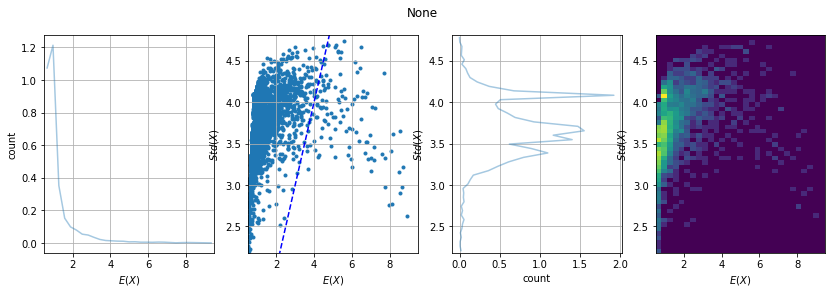

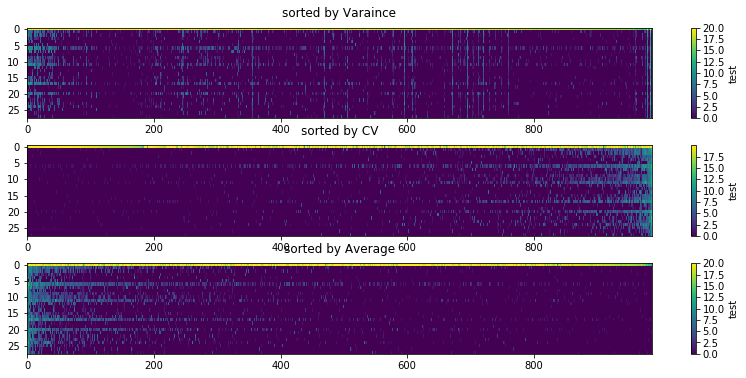

In [167]:
sutil.qc_Sort(dfc)

In [ ]:
print dfc.sort_values('SIZE',ascending=False).reset_index(drop=1)[['SIZE','FILEACC']].to_csv(sep='\t')